<a href="https://colab.research.google.com/github/csabiu/astronomy/blob/main/Astro_Coma_luminosity_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install some packages and import them

In [1]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.3 MB/s 
     |████████████████████████████████| 832 kB 40.1 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 4.1 MB 24.6 MB/s 


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, Distance
import astropy.coordinates as coord
from astropy import units as u
from astropy.cosmology import WMAP7, Planck13
from astroquery.sdss import SDSS


In [3]:
# Coma Cluster centre RA: 12h 59m 35.71s dec: +27deg 57m 33.8s
# Convert to degrees...
pos = SkyCoord('12h59m35.709s +27d57m33.8s', frame='icrs')
print(pos.ra.deg, pos.dec.deg)

194.89878749999997 27.95938888888889


In [13]:
# This is a sample query of the SDSS database
# It uses a function "fGetNearbyObjEq" to retrieve objects near a specified point 
# fGetNearbyObjEq(RA, DEC, radius) where RA,DEC are in degrees and the search radius is in arcmins
# Cut out 50 arcmin around Coma cluster centre replace (X,Y,Z)
# What information do you need from the database to complete the task?
# replace "something" and "something2" appropriatley
query = "SELECT G.objID, GN.distance, G.ra, G.dec, G.cModelMag_r \
          FROM PhotoObjAll as G  \
          JOIN dbo.fGetNearbyObjEq(194.898,27.9593, 50.) AS GN \
          ON G.objID = GN.objID \
          WHERE (G.type = 3)"

res = SDSS.query_sql(query)

In [14]:
# cut out objects with fainter magnitide than SDSS limit (m_r~17.8)
res=res[res['cModelMag_r']<17.8]

In [15]:
# extract quantities from res
ra=res['ra']
dec=res['dec']
m_r=res['cModelMag_r']
d=res['distance']

Text(0, 0.5, 'dec')

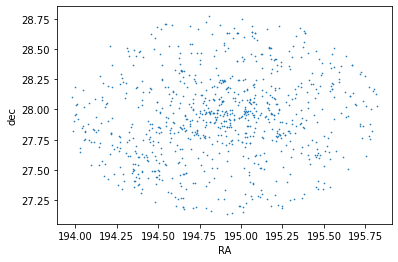

In [16]:
# Plot the RA, Dec scatter of the objects
plt.scatter(ra,dec,s=0.4,alpha=1)
plt.xlabel('RA')
plt.ylabel('dec')

In [17]:
# compute Absolute magnitude without redshift ie all galaxies have ~same distance - using distance to Coma as 100Mpc
M_r=m_r-5*np.log10(100)-25.0

Text(0, 0.5, '$\\Phi(M)$')

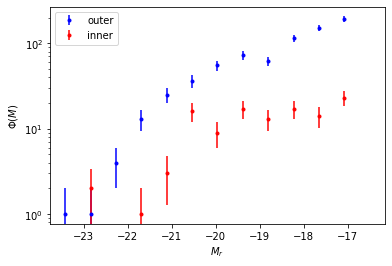

In [29]:
# Compute 2 LF functions for galaxies 1) inside 10arcmins 2) outside 10arcmins  from Coma centre
# Plot both together and comment on the differences
# Plot errorbars assuming poisson error


a=plt.hist(M_r[d>10],range=[-24,-16.5],bins=13)
b=plt.hist(M_r[d<10],range=[-24,-16.5],bins=13)
plt.close()

plt.errorbar(a[1][1:],a[0],yerr=np.sqrt(a[0]),color='b', linestyle=' ', marker='.',label='outer')
plt.yscale('log')
plt.errorbar(b[1][1:],b[0],yerr=np.sqrt(b[0]),color='r', linestyle=' ', marker='.',label='inner')
plt.legend()
plt.xlabel(r'$M_r$')
plt.ylabel(r'$\Phi(M)$')